In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import time
from sklearn.svm import LinearSVC
import seaborn as sns
np.random.seed(42)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
len(X_train)

56000

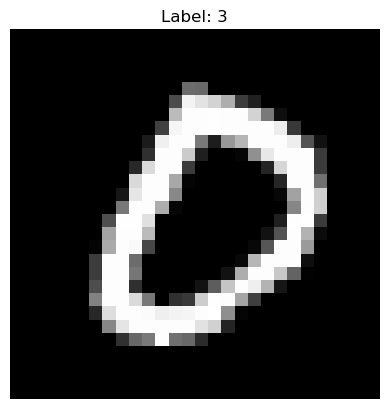

In [4]:
image_index = 7
image = X_train[image_index]
label = y[image_index]
image_flat = X_train[image_index] # This is currently (784,)
image_2d = image_flat.reshape(28, 28)
# Display the image
plt.imshow(image_2d, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

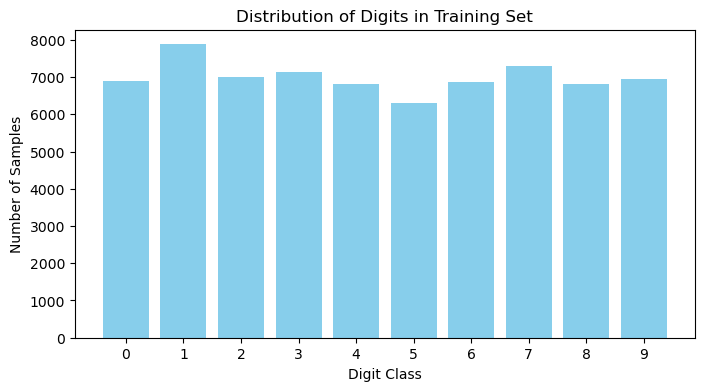

In [5]:
import numpy as np

# Count the occurrences of each digit
unique_digits, counts = np.unique(y, return_counts=True)

# Plot the distribution
plt.figure(figsize=(8, 4))
plt.bar(unique_digits, counts, color='skyblue')
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.xticks(unique_digits)
plt.show()

<h1>Phase 1: Data Preparation </h1>

In [6]:
# Flatten the Images:

In [7]:
image_flat = X # This is currently (784,)
image_2d = image_flat.reshape(-1, 784) # -1 numpy propert to automatically adjust the size of

In [8]:
X_norm = X/255

In [9]:
X_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<h1>Phase 2: Model Training </h1>

We have 2 models options <b>Linear SVC</b> and <b>SVC(kerenel='linear')</b>
for better speed we select <h3>Linear SVC</h3>

In [10]:
# Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
linear_svm = LinearSVC(C=1.0, max_iter=3000, dual=True, random_state=42)

In [13]:
start_time = time.time()

In [11]:
linear_svm.fit(X_train,y_train)

/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=3000, random_state=42)

In [12]:
end_time = time.time()
training_time = end_time - start_time

NameError: name 'start_time' is not defined

In [14]:
print("Linear-SVM training completed.")
print(f"Training Time: {training_time:.2f} seconds")

Linear-SVM training completed.


NameError: name 'training_time' is not defined

Grid search<n>
C grid={0.001,0.01,0.1,1,10,100}

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [23]:
# Create a smaller subset for faster tuning
sample_size = 10000
X_tune = X_train[:sample_size]
y_tune = y_train[:sample_size]

In [24]:
svm = LinearSVC(dual=True, random_state=42, max_iter=5000)

In [25]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0]
}

In [27]:
grid_search = GridSearchCV(
    estimator=svm, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5, # k-fold 5
    verbose=3, 
    n_jobs=-1  # Use all available CPU cores
)

In [28]:
print(f"Starting Grid Search (testing {len(param_grid['C'])} C values with 5-fold CV on {sample_size} samples)...")

start_time = time.time()

Starting Grid Search (testing 5 C values with 5-fold CV on 10000 samples)...


In [29]:
grid_search.fit(X_tune, y_tune)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=5000, random_state=42),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0]},
             scoring='accuracy', verbose=3)

In [30]:
end_time = time.time()
print(f"Total Tuning Time: {end_time - start_time:.2f} seconds")

Total Tuning Time: 149.67 seconds


<b>Get a best C</b>

In [31]:
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_
print("\n--- TUNING RESULTS ---")
print(f"Optimal C found: {best_C}")
print(f"Best cross-validation accuracy: {best_score:.4f}")


--- TUNING RESULTS ---
Optimal C found: 0.001
Best cross-validation accuracy: 0.8478


In [33]:
y_pred = grid_search.predict(X_test)

In [34]:
final_accuracy = accuracy_score(y_test, y_pred)
print("\n--- FINAL EVALUATION ---")
print(f"Test Set Accuracy with Optimal C ({best_C}): {final_accuracy:.4f}")
print("\nClassification Report (per-digit performance):")
print(classification_report(y_test, y_pred))


--- FINAL EVALUATION ---
Test Set Accuracy with Optimal C (0.001): 0.8520

Classification Report (per-digit performance):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1381
           1       0.93      0.96      0.95      1575
           2       0.83      0.82      0.82      1398
           3       0.81      0.84      0.82      1428
           4       0.84      0.85      0.85      1365
           5       0.82      0.73      0.77      1263
           6       0.88      0.91      0.89      1375
           7       0.86      0.88      0.87      1459
           8       0.79      0.79      0.79      1365
           9       0.83      0.79      0.81      1391

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.85      0.85      0.85     14000

[CV 4/5] END ...........................C=0.001;, score=0.853 total time=  35.2s
[CV 5/5] END ........................

/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...........................C=0.001;, score=0.858 total time=  35.2s
[CV 1/5] END .............................C=0.1;, score=0.835 total time=  36.4s
[CV 5/5] END .............................C=1.0;, score=0.831 total time=  32.6s
[CV 2/5] END ............................C=0.01;, score=0.842 total time=  35.9s
[CV 5/5] END .............................C=0.1;, score=0.826 total time=  33.7s
[CV 4/5] END .............................C=1.0;, score=0.836 total time=  34.7s


/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear fa

[CV 2/5] END ...........................C=0.001;, score=0.849 total time=  35.7s
[CV 4/5] END .............................C=0.1;, score=0.845 total time=  36.0s
[CV 1/5] END ............................C=10.0;, score=0.827 total time=  34.6s


/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ............................C=0.01;, score=0.841 total time=  35.6s
[CV 3/5] END .............................C=0.1;, score=0.847 total time=  36.9s
[CV 3/5] END ............................C=10.0;, score=0.842 total time=  34.3s
[CV 1/5] END ...........................C=0.001;, score=0.846 total time=  36.5s
[CV 1/5] END .............................C=1.0;, score=0.836 total time=  36.7s
[CV 4/5] END ............................C=10.0;, score=0.852 total time=  33.8s


/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear fa

[CV 3/5] END ............................C=0.01;, score=0.848 total time=  35.2s
[CV 2/5] END .............................C=0.1;, score=0.837 total time=  37.1s
[CV 2/5] END ............................C=10.0;, score=0.843 total time=  34.8s


/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...........................C=0.001;, score=0.835 total time=  32.0s
[CV 4/5] END ............................C=0.01;, score=0.830 total time=  35.1s
[CV 2/5] END .............................C=1.0;, score=0.834 total time=  35.4s
[CV 5/5] END ............................C=10.0;, score=0.837 total time=  13.0s


/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<h1>Phase 3: Model Evaluation</h1>

In [37]:
final_model = grid_search.best_estimator_

In [38]:
print("Generating predictions on the test set...")
start_time = time.time()
y_pred = final_model.predict(X_test)
end_time = time.time()
print(f"Prediction Time: {end_time - start_time:.2f} seconds")

Generating predictions on the test set...
Prediction Time: 0.07 seconds


In [39]:
overall_accuracy = accuracy_score(y_test, y_pred)
print("\n--- PERFORMANCE METRICS ---")
print(f"1. Overall Test Accuracy: {overall_accuracy:.4f}")


--- PERFORMANCE METRICS ---
1. Overall Test Accuracy: 0.8520



2. Confusion Matrix:


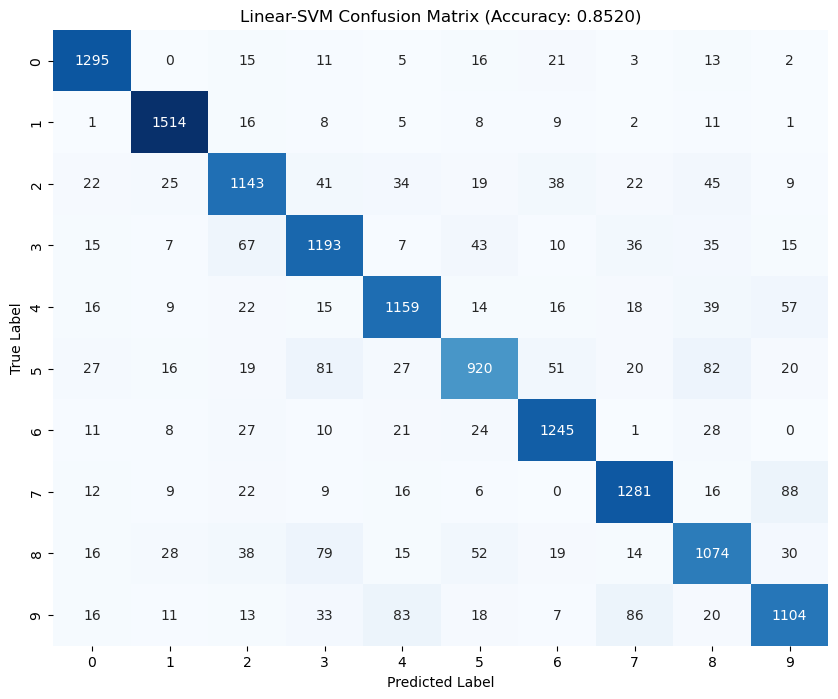

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n2. Confusion Matrix:")
# Display the Confusion Matrix visually
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt="d", 
            cmap="Blues",
            cbar=False,
            xticklabels=range(10), 
            yticklabels=range(10))
plt.title(f'Linear-SVM Confusion Matrix (Accuracy: {overall_accuracy:.4f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show() 